In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

from sympy import *
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# STEEPEST DESCENT
-----------

In [2]:
epsilon = 10e-5

def steepestDescentUpdate(xk, deriv1_xk, Q):
    """
        xk:        Current value 
        deriv1_xk: First order derivative of function f(xk)
        Q :        Q formed when we convert the function in standard form
                   Also equivallent to Hessian matrix, Computation is needed only once
                   No update is required,
                   Note: The hessian in Newton is computationally expensive, since we do the matrix inversion
        
        pk (Search direction) = - deriv1_xk 
    """
    pk = -1 * deriv1_xk # We just take a step in the negative direction of the gradient
    alpha = np.dot(np.transpose(pk), deriv1_xk) / np.dot(np.dot(np.transpose(pk), Q), pk)
    xk1 = xk - alpha*pk
    return xk1

def iterate(f, xk, deriv_1, Q, numFeatures, numSteps, should_print):
    fx_arr = []
    gradientNorm_arr = []
    for step in range(numSteps): 
        if numFeatures == 3:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                                 for eq in deriv_1], dtype='float32')
            Q_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1], x3:xk[2]}) 
                          for rows in Q 
                          for cell in rows], dtype='float32').reshape(3,3)
            
        elif numFeatures == 2:
            fx = f.evalf(subs={x1:xk[0], x2:xk[1]})
            gradient_xk = np.array([eq.evalf(subs={x1:xk[0], x2:xk[1]}) for eq in deriv_1], dtype='float32')
            Q_lv = np.array([cell.evalf(subs={x1:xk[0], x2:xk[1]}) 
                          for rows in Q
                          for cell in rows], dtype='float32').reshape(2,2)
        else:
            raise ValueError('Num Features doesnt match the hadled condition')
            
        fx_arr.append(fx)
        gradientNorm = np.linalg.norm(gradient_xk)
        gradientNorm_arr.append(gradientNorm)
        
        if should_print:
            if (step+1)%should_print == 0:
                print('')
                print ('##########################################################')
                print ('Function F at x: f(x) ', fx)
                print ('Gradient at xk%s is: '%str(step), gradient_xk)
                print ("####### Gradient Norm: ", gradientNorm)
                print('The updated Value xk%s is \n'%(step+1), xk)
                
#         print ((gradientNorm/(1+np.abs(gradient_xk))))
#         print ((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon)
#         print (np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon))
        if np.sum((gradientNorm/(1+np.abs(gradient_xk))) <= epsilon) == len(gradient_xk) or (step == 1000):
            print('The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)')
            break
            
#         print ('21121212222232')
        
        xk1 = steepestDescentUpdate(xk=xk, deriv1_xk=gradient_xk, Q=Q_lv)
        xk = xk1
        
    return fx_arr, gradientNorm_arr

        

## PLOT

In [3]:
# def plot(x):
#     plt.plot(np.arange(len(x)), x, edgecolor='k')
#     plt.xlabel("Number of Iteration")
#     plt.ylabel('Loss Function')
#     plt.grid(True)
    
def plot(x_arr, rows=1, columns=2, figsize=(12, 6)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no, arrVal in enumerate(x_arr):
        axs[no].plot(np.arange(len(arrVal)), arrVal)
    

## Test subject for example 12.1 in book page: 404

In [4]:
# x1 = Symbol('x1')
# x2 = Symbol('x2')
# x3 = Symbol('x3')

# f = 0.5*pow(x1,2) + 0.5*5*pow(x2,2) + 0.5*25*pow(x3,2) + x1 +x2 +x3
# deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
# print ('First order Derivative: ', deriv_1)
# Q = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case
# print ('Second order Derivative: \n', Q)

# # Initialize Xk
# xk = np.array([0,0,0])

# iterate(xk, deriv_1, Q, numFeatures=3, numSteps=5, should_print=1)

#### Solution d(1)

First order Derivative:  [2*x1 2*x2 2*x3]
Second order Derivative: 
 [[2 0 0]
 [0 2 0]
 [0 0 2]]

##########################################################
Function F at x: f(x)  3.00000000000000
Gradient at xk0 is:  [ 2.  2.  2.]
####### Gradient Norm:  3.4641
The updated Value xk1 is 
 [1 1 1]

##########################################################
Function F at x: f(x)  0
Gradient at xk1 is:  [ 0.  0.  0.]
####### Gradient Norm:  0.0
The updated Value xk2 is 
 [0 0 0]


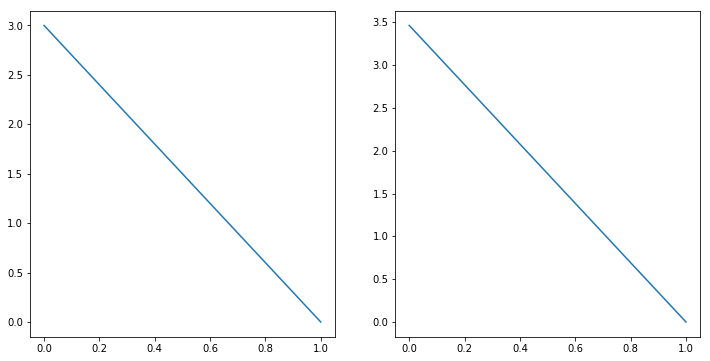

In [5]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')

f = pow(x1,2) + pow(x2,2) + pow(x3,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2), f.diff(x3)])
print ('First order Derivative: ', deriv_1)
Q = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2,x3]]).reshape(3,3)  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case
print ('Second order Derivative: \n', Q)

# Initialize Xk
xk = np.array([1,1,1])

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=3, numSteps=10, should_print=1)

plot([fx_array, gradientNorm_arr])


#### Solution d(2)

First order Derivative:  [2*x1 - 2*x2 -2*x1 + 4*x2 - 2]
Second order Derivative: 
 [[2 -2]
 [-2 4]]

##########################################################
Function F at x: f(x)  -0.999998092651367
Gradient at xk19 is:  [-0.00195312  0.        ]
####### Gradient Norm:  0.00195312
The updated Value xk20 is 
 [ 0.99804688  0.99902344]
The check (gradient norm equation reach a val < epsilon, HENCE BREAKING OUT OF LOOP)


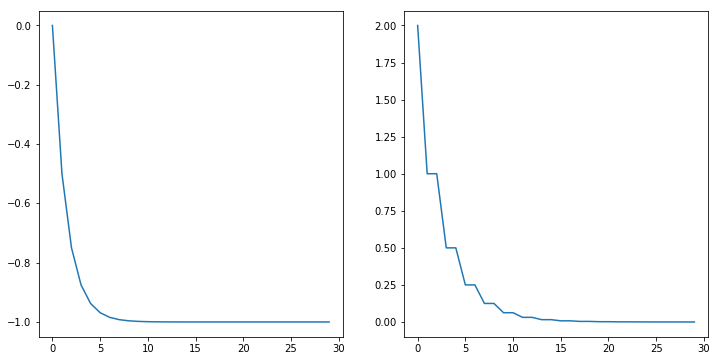

In [5]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1,2) + 2*pow(x2,2) - 2*x1*x2 - 2*x2
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
print ('First order Derivative: ', deriv_1)
Q = np.array([d_eq.diff(xn) for d_eq in deriv_1 for xn in [x1,x2]]).reshape(2,2)  # Q is obtained by converting the funciton into quadratic form, which is equivallent to 2nd order derivative in all our case
print ('Second order Derivative: \n', Q)

# Initialize Xk
xk = np.array([0,0], dtype='float32')

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=100, should_print=20)

plot([fx_array,gradientNorm_arr])

#### Solution d(3)

Q: 
 [[1200*x1**2 - 400*x2 + 2 -400*x1]
 [-400*x1 200]]

##########################################################
Function F at x: f(x)  3.27727394696525
Gradient at xk99 is:  [ 0.05820709  2.27562428]
####### Gradient Norm:  2.27637
The updated Value xk100 is 
 [-0.806745079764272 0.662215744707947]

##########################################################
Function F at x: f(x)  8.42342989228450
Gradient at xk199 is:  [ 2.99707127  2.31501508]
####### Gradient Norm:  3.78705
The updated Value xk200 is 
 [-1.90000545797205 3.62159581527661]

##########################################################
Function F at x: f(x)  8.19232592727461
Gradient at xk299 is:  [ 2.14428926  2.11389351]
####### Gradient Norm:  3.01107
The updated Value xk300 is 
 [-1.86027176379408 3.47118050276110]

##########################################################
Function F at x: f(x)  8.00535610226593
Gradient at xk399 is:  [ 1.66617084  2.00300097]
####### Gradient Norm:  2.60541
The updated Value xk4

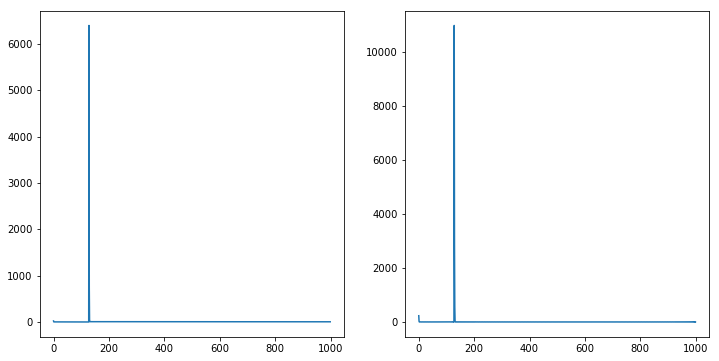

In [7]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = 100*pow(x2-pow(x1,2),2) + pow(1-x1,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
              [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
print ('Q: \n', Q)


# Initialize Xk
xk = np.array([-1.2,1], dtype='float32')

# fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

plot([fx_array, gradientNorm_arr])

#### Solution d(4)

Q: 
 [[12*(x1 + x2**2)**2 24*x2*(x1 + x2**2)**2]
 [24*x2*(x1 + x2**2)**2 48*x2**2*(x1 + x2**2)**2 + 8*(x1 + x2**2)**3 + 2]]


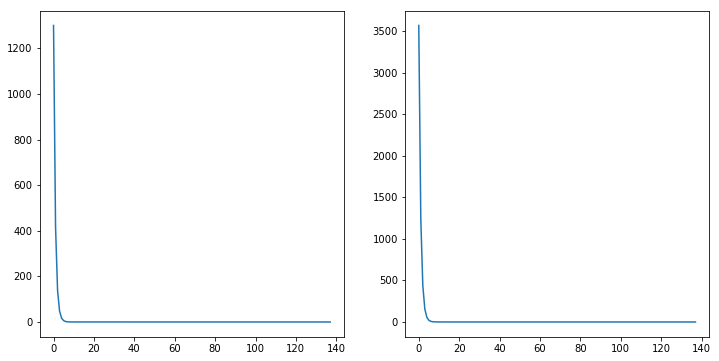

In [8]:
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1+pow(x2, 2),4) + pow(x2,2)
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])
print ('Q: \n', Q)


# Initialize Xk
xk = np.array([2,-2], dtype='float32')

# fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=200)

plot([fx_array, gradientNorm_arr])

#### Solution d(4)

Q: 
 [[2 0]
 [0 12*x2**2 + 5.0]]


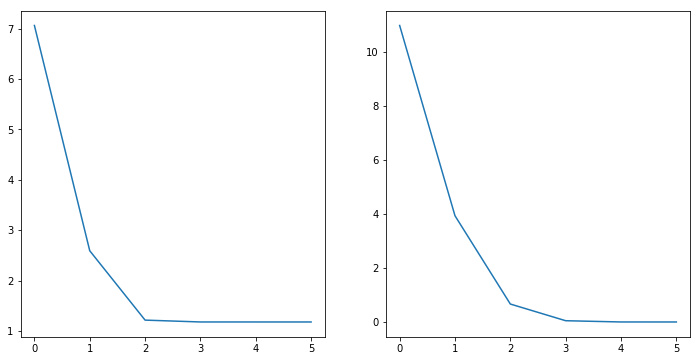

In [10]:
c = 1
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1-1, 2) + pow(x2-1, 2) + c*pow((pow(x1,0) + pow(x2,2) - 0.25), 2)
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])

print ('Q: \n', Q)


# Initialize Xk
xk = np.array([1,-1], dtype='float32')

# fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

plot([fx_array, gradientNorm_arr])

Q: 
 [[2 0]
 [0 120*x2**2 + 32.0]]


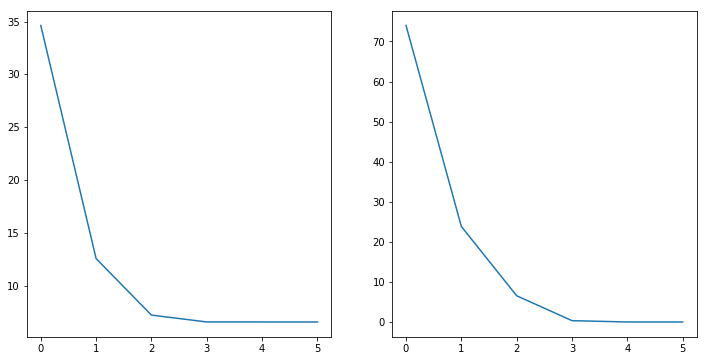

In [11]:
c = 10
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1-1, 2) + pow(x2-1, 2) + c*pow((pow(x1,0) + pow(x2,2) - 0.25), 2)
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])

print ('Q: \n', Q)


# Initialize Xk
xk = np.array([1,-1], dtype='float32')

# fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

plot([fx_array, gradientNorm_arr])

Q: 
 [[2 0]
 [0 1200*x2**2 + 302.0]]


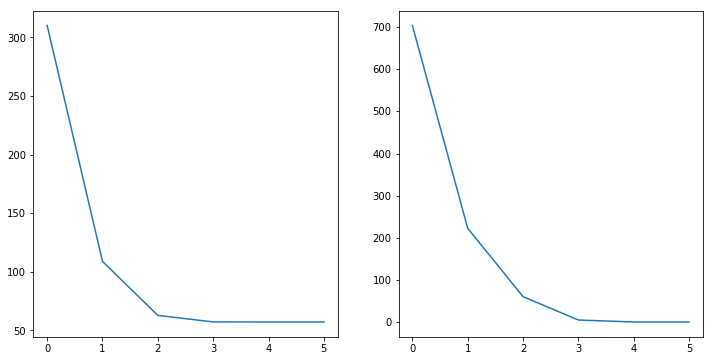

In [12]:
c = 100
x1 = Symbol('x1')
x2 = Symbol('x2')
f = pow(x1-1, 2) + pow(x2-1, 2) + c*pow((pow(x1,0) + pow(x2,2) - 0.25), 2)
deriv_1 = np.array([f.diff(x1), f.diff(x2)])
Q = np.array([[deriv_1[0].diff(x1),deriv_1[0].diff(x2)],
                    [deriv_1[1].diff(x1),deriv_1[1].diff(x2)]])

print ('Q: \n', Q)


# Initialize Xk
xk = np.array([1,-1], dtype='float32')

# fx_array = iterate(f, xk, deriv_1, Q, Bk, numFeatures=2, numSteps=5)

fx_array, gradientNorm_arr = iterate(f, xk, deriv_1, Q, numFeatures=2, numSteps=1000, should_print=100)

plot([fx_array, gradientNorm_arr])